In [1]:
#Load Libraries-
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import KNN
from random import randrange,uniform
from ggplot import *
from scipy.stats import chi2_contingency
from sklearn.metrics import r2_score
from scipy import stats

C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
#Set working directory-
os.chdir("D:/Python-programming/1.Project-Employee Absenteeism")
os.getcwd()

'D:\\Python-programming\\1.Project-Employee Absenteeism'

In [157]:
#Load data-
data= pd.read_excel("Absenteeism_at_work_Project.xls")

In [164]:
data.iloc[0:6:,14:21]

,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,1.0,0.0,0.0,89.0,170.0,31.0,NaN


# Exploratory Data Analysis

In [53]:
data.head()
data.shape
data.dtypes

ID                                   int64
Reason for absence                 float64
Month of absence                   float64
Day of the week                      int64
Seasons                              int64
Transportation expense             float64
Distance from Residence to Work    float64
Service time                       float64
Age                                float64
Work load Average/day              float64
Hit target                         float64
Disciplinary failure               float64
Education                          float64
Son                                float64
Social drinker                     float64
Social smoker                      float64
Pet                                float64
Weight                             float64
Height                             float64
Body mass index                    float64
Absenteeism time in hours          float64
dtype: object

In [54]:
# Replacing the white spaces " " in the feature name with "_"
for i in data.columns:
    data = data.rename(index=str, columns={i: i.replace(" ", "_")})

In [55]:
data.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   13
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average/day_             38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [56]:
#since month variable can contain maximum 12 values, so here replace 0 with NA-
data['Month_of_absence']= data['Month_of_absence'].replace(0,np.nan)

data.nunique()

ID                                 36
Reason_for_absence                 28
Month_of_absence                   12
Day_of_the_week                     5
Seasons                             4
Transportation_expense             24
Distance_from_Residence_to_Work    25
Service_time                       18
Age                                22
Work_load_Average/day_             38
Hit_target                         13
Disciplinary_failure                2
Education                           4
Son                                 5
Social_drinker                      2
Social_smoker                       2
Pet                                 6
Weight                             26
Height                             14
Body_mass_index                    17
Absenteeism_time_in_hours          19
dtype: int64

In [57]:
#remove redudant variable (ID variable does not carry meanningful information,so remove it)
data= data.drop(['ID'],axis=1)

In [58]:
# Dividing Work_load_Average/day_ by 1000 (As told by the support team)
data['Work_load_Average/day_'] = data['Work_load_Average/day_']/1000

In [59]:
data.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

In [60]:
#Extract numeric and categorical varaibles
cnames=['Transportation_expense', 'Distance_from_Residence_to_Work','Service_time', 'Age',
        'Work_load_Average/day_', 'Hit_target','Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours']

cat_cnames= ['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
             'Disciplinary_failure', 'Education', 'Son', 'Social_drinker','Social_smoker', 'Pet']

# Data Pre-processing

# Missing value Analysis-

In [61]:
#Missing values in each variable-
data.isnull().sum()

Reason_for_absence                  3
Month_of_absence                    4
Day_of_the_week                     0
Seasons                             0
Transportation_expense              7
Distance_from_Residence_to_Work     3
Service_time                        3
Age                                 3
Work_load_Average/day_             10
Hit_target                          6
Disciplinary_failure                6
Education                          10
Son                                 6
Social_drinker                      3
Social_smoker                       4
Pet                                 2
Weight                              1
Height                             14
Body_mass_index                    31
Absenteeism_time_in_hours          22
dtype: int64

In [62]:
# Droping observation in which "Absenteeism time in hours" has missing value-
data = data.drop(data[data['Absenteeism_time_in_hours'].isnull()].index, axis=0)
print(data.shape)

(718, 20)


In [63]:
##Missing value analysis-

#Creat dataframe with missing value present in each variable-
missing_value= pd.DataFrame(data.isnull().sum()).reset_index()

#Rename variable-
missing_value= missing_value.rename(columns={'index':'variable',0:'missing_precentage'})

#Missing value precentage-
missing_value['missing_precentage']= (missing_value['missing_precentage']/len(data))*100

#Sorting missing value-
missing_value= missing_value.sort_values('missing_precentage',ascending=False).reset_index(drop=True)

#Write missing data into drive-
missing_value.to_csv("missing_value.csv",index=False)


In [64]:
missing_value

,variable,missing_precentage
0,Body_mass_index,4.038997
1,Height,1.949861
2,Education,1.392758
3,Work_load_Average/day_,1.114206
4,Transportation_expense,0.835655
5,Son,0.835655
6,Hit_target,0.835655
7,Disciplinary_failure,0.696379
8,Social_smoker,0.557103
9,Month_of_absence,0.557103


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

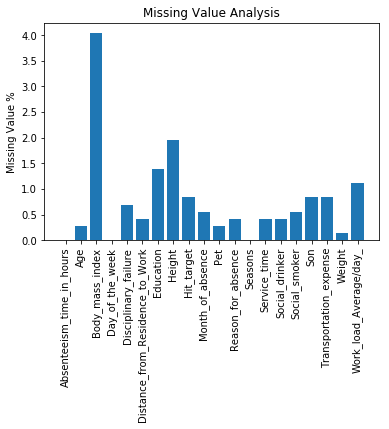

In [167]:
#Missing value analysis by visualization-
plt.bar(missing_value['variable'],missing_value['missing_precentage'])
plt.ylabel('Missing Value %')
plt.title('Missing Value Analysis')
plt.savefig('missing_value.pdf')
plt.xticks(rotation=90)

In [66]:
#Missing value imputation for categorical varibles-
for i in cat_cnames:
    print(i)
    data[i] = data[i].fillna(data[i].mode()[0])
    print(data[i])

Reason_for_absence
0      26.0
1       0.0
2      23.0
3       7.0
4      23.0
6      22.0
7      23.0
8      19.0
9      22.0
10      1.0
11      1.0
12     11.0
13     11.0
14     23.0
16     23.0
17     21.0
18     11.0
19     23.0
21     11.0
22     13.0
23     28.0
24     18.0
25     25.0
26     23.0
27     28.0
28     18.0
29     23.0
30     18.0
31     18.0
32     23.0
       ... 
710    22.0
711    19.0
712    19.0
713    27.0
714     0.0
715     0.0
716    19.0
717    13.0
718    28.0
719    13.0
720    25.0
721    22.0
722     8.0
723    10.0
724    22.0
725    26.0
726    19.0
727     6.0
728    28.0
729     6.0
730    22.0
731    23.0
732    22.0
733    22.0
734    13.0
735    14.0
736    11.0
737     0.0
738     0.0
739     0.0
Name: Reason_for_absence, Length: 718, dtype: float64
Month_of_absence
0      7.0
1      7.0
2      7.0
3      7.0
4      7.0
6      7.0
7      7.0
8      7.0
9      7.0
10     7.0
11     7.0
12     7.0
13     7.0
14     7.0
16     7.0
17     7.0
18

In [67]:
##Missing value imputation for numeric variables-

#Lets take one sample data for referance-
data['Body_mass_index'][29]
#Actual Value= 29.0
#Mean= 26.703488372093023
#Median= 25.0
#KNN= 29.816416946640054

data['Body_mass_index'][29]=np.nan     #Replace sample data with NA for check the accuracy of imputation method.


C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [24]:
#Mean  method-
data['Body_mass_index']= data['Body_mass_index'].fillna(data['Body_mass_index'].mean())

data['Body_mass_index'][29]
#Mean = 26.703488372093023

26.703488372093023

In [44]:
#Median method-
data['Body_mass_index'][29]=np.nan
data['Body_mass_index']=data['Body_mass_index'].fillna(data['Body_mass_index'].median())

data['Body_mass_index'][29]
#Median=25

C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


25.0

In [68]:
#KNN method-
data['Body_mass_index'][29]=np.nan
data= pd.DataFrame(KNN(k=3).fit_transform(data),columns=data.columns)

data['Body_mass_index'][29]
#KNN=29.816416946640054

C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Imputing row 1/718 with 0 missing, elapsed time: 0.267
Imputing row 101/718 with 1 missing, elapsed time: 0.271
Imputing row 201/718 with 0 missing, elapsed time: 0.273
Imputing row 301/718 with 0 missing, elapsed time: 0.275
Imputing row 401/718 with 0 missing, elapsed time: 0.276
Imputing row 501/718 with 1 missing, elapsed time: 0.278
Imputing row 601/718 with 0 missing, elapsed time: 0.279
Imputing row 701/718 with 0 missing, elapsed time: 0.279


29.816416946640054

In [69]:
# Checking if all the missing value imputed
data.isnull().sum()

Reason_for_absence                 0
Month_of_absence                   0
Day_of_the_week                    0
Seasons                            0
Transportation_expense             0
Distance_from_Residence_to_Work    0
Service_time                       0
Age                                0
Work_load_Average/day_             0
Hit_target                         0
Disciplinary_failure               0
Education                          0
Son                                0
Social_drinker                     0
Social_smoker                      0
Pet                                0
Weight                             0
Height                             0
Body_mass_index                    0
Absenteeism_time_in_hours          0
dtype: int64

# Outlier Analysis-

In [70]:
#copy of data-

#df= data.copy()
data= df.copy()

In [71]:
cnames

['Transportation_expense',
 'Distance_from_Residence_to_Work',
 'Service_time',
 'Age',
 'Work_load_Average/day_',
 'Hit_target',
 'Weight',
 'Height',
 'Body_mass_index',
 'Absenteeism_time_in_hours']

Transportation_expense


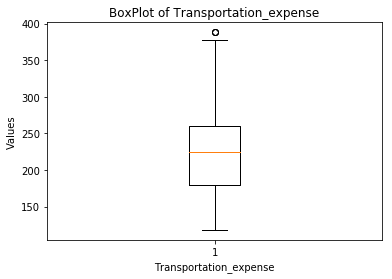

Distance_from_Residence_to_Work


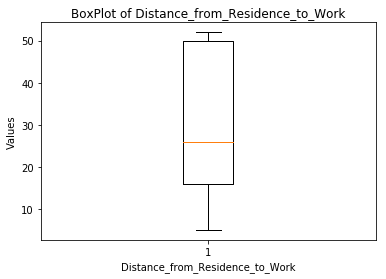

Service_time


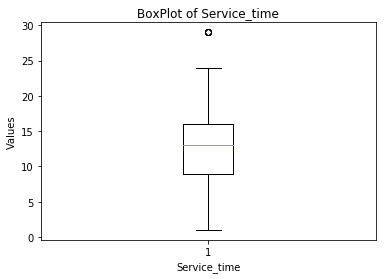

Age


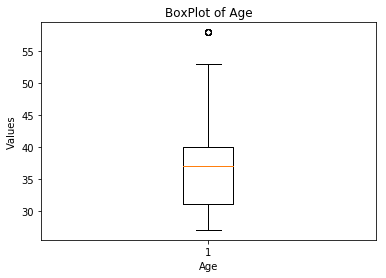

Work_load_Average/day_


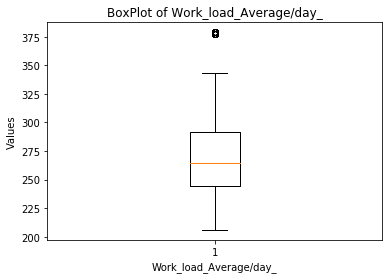

Hit_target


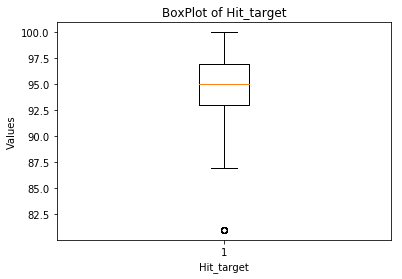

Weight


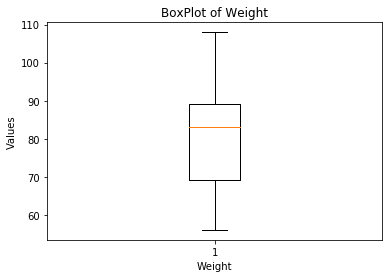

Height


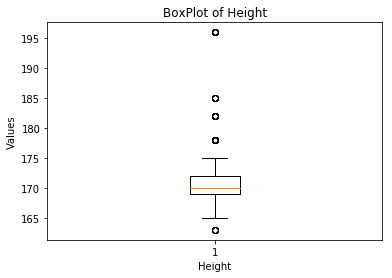

Body_mass_index


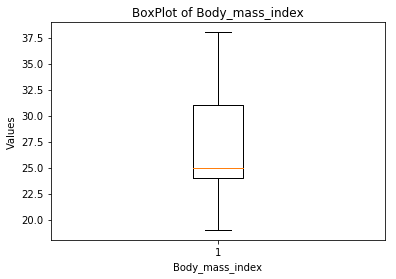

Absenteeism_time_in_hours


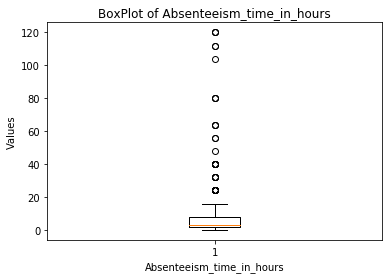

In [72]:
##Plot boxplot to visulazie outliers-
for i in cnames:
    print(i)
    plt.boxplot(data[i])
    plt.xlabel(i)
    plt.ylabel('Values')
    plt.title("BoxPlot of "+i)
    plt.show()

In [73]:
##Calculate iqr, lower fence and upper fence-
for i in cnames:
    print(i)
    q75,q25= np.percentile(data.loc[:,i],[75,25])
    iqr= q75-q25
    minimum= q25-(iqr*1.5)
    maximum= q75+(iqr*1.5)
    print(minimum)
    print(maximum)
    print(iqr)

#Replace outliers with NA-    
    data.loc[data[i]< minimum,i] = np.nan
    data.loc[data[i]> maximum,i] = np.nan

Transportation_expense
57.5
381.5
81.0
Distance_from_Residence_to_Work
-35.0
101.0
34.0
Service_time
-1.5
26.5
7.0
Age
17.5
53.5
9.0
Work_load_Average/day_
173.15350000000004
363.1094999999999
47.488999999999976
Hit_target
87.0
103.0
4.0
Weight
39.0
119.0
20.0
Height
164.5
176.5
3.0
Body_mass_index
13.5
41.5
7.0
Absenteeism_time_in_hours
-7.0
17.0
6.0


In [74]:
#Check NA in dataset-
data.isnull().sum()

#Impute NA with KNN-

data= pd.DataFrame(KNN(k=3).fit_transform(data),columns=data.columns)

Imputing row 1/718 with 0 missing, elapsed time: 0.281
Imputing row 101/718 with 0 missing, elapsed time: 0.283
Imputing row 201/718 with 1 missing, elapsed time: 0.286
Imputing row 301/718 with 0 missing, elapsed time: 0.292
Imputing row 401/718 with 0 missing, elapsed time: 0.294
Imputing row 501/718 with 0 missing, elapsed time: 0.296
Imputing row 601/718 with 2 missing, elapsed time: 0.298
Imputing row 701/718 with 0 missing, elapsed time: 0.301


In [75]:
df1= data

# Feature Selection-

In [76]:
df= data.copy()
data= df.copy()

In [77]:
cat_cnames

['Reason_for_absence',
 'Month_of_absence',
 'Day_of_the_week',
 'Seasons',
 'Disciplinary_failure',
 'Education',
 'Son',
 'Social_drinker',
 'Social_smoker',
 'Pet']

In [78]:
##Correlation analysis for numeric variables-

#extract only numeric variables in dataframe for correlation-
df_corr= data.loc[:,cnames]

#Generate correlation matrix-
corr_matrix= df_corr.corr()

In [79]:
corr_matrix

,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
Transportation_expense,1.000000,0.266940,-0.385904,-0.261317,-0.014478,-0.084040,-0.198477,-0.061436,-0.120465,0.192174
Distance_from_Residence_to_Work,0.266940,1.000000,0.121563,-0.095117,-0.081580,0.028050,-0.031946,-0.196777,0.131062,-0.004184
Service_time,-0.385904,0.121563,1.000000,0.646516,-0.063252,0.049683,0.423626,-0.056136,0.471658,-0.058076
Age,-0.261317,-0.095117,0.646516,1.000000,-0.054495,-0.020749,0.498177,-0.105807,0.553311,-0.083672
Work_load_Average/day_,-0.014478,-0.081580,-0.063252,-0.054495,1.000000,0.030202,-0.093550,-0.051549,-0.125038,0.050705
Hit_target,-0.084040,0.028050,0.049683,-0.020749,0.030202,1.000000,-0.019882,0.040103,-0.058425,0.029598
Weight,-0.198477,-0.031946,0.423626,0.498177,-0.093550,-0.019882,1.000000,0.149788,0.902870,-0.010765
Height,-0.061436,-0.196777,-0.056136,-0.105807,-0.051549,0.040103,0.149788,1.000000,-0.108882,0.043222
Body_mass_index,-0.120465,0.131062,0.471658,0.553311,-0.125038,-0.058425,0.902870,-0.108882,1.000000,-0.040058
Absenteeism_time_in_hours,0.192174,-0.004184,-0.058076,-0.083672,0.050705,0.029598,-0.010765,0.043222,-0.040058,1.000000


Text(0.5,1,'Correlation Plot')

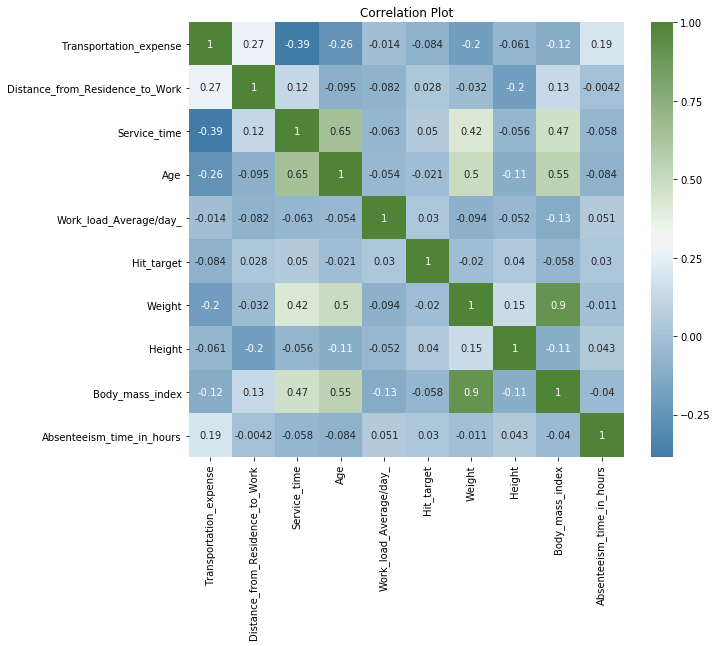

In [173]:
#Corrleation plot-

#Set height and width of page-
f,ax= plt.subplots(figsize=(10,8))

#Plot-
sns.heatmap(corr_matrix,mask=np.zeros_like(corr_matrix,dtype=np.bool),cmap=sns.diverging_palette(240,120,as_cmap=True),
           square=True,ax=ax,annot=True)
plt.title("Correlation Plot")

In [81]:
##Anova test for categorical predictor and numeric target variable-

import statsmodels.api as sm
from statsmodels.formula.api import ols

label = 'Absenteeism_time_in_hours'
for  i in cat_cnames:
    frame = label + ' ~ ' + i
    model = ols(frame,data=data).fit()
    anova = sm.stats.anova_lm(model, typ=2)
    print(anova)  

                         sum_sq     df          F    PR(>F)
Reason_for_absence   204.282325    1.0  17.915574  0.000026
Residual            8164.189531  716.0        NaN       NaN
                       sum_sq     df         F    PR(>F)
Month_of_absence     0.292084    1.0  0.024991  0.874433
Residual          8368.179772  716.0       NaN       NaN
                      sum_sq     df         F    PR(>F)
Day_of_the_week    54.172342    1.0  4.665143  0.031112
Residual         8314.299514  716.0       NaN       NaN
               sum_sq     df         F    PR(>F)
Seasons     29.539590    1.0  2.536337  0.111694
Residual  8338.932266  716.0       NaN       NaN
                           sum_sq     df          F        PR(>F)
Disciplinary_failure   668.371022    1.0  62.149011  1.188029e-14
Residual              7700.100834  716.0        NaN           NaN
                sum_sq     df         F    PR(>F)
Education     3.693486    1.0  0.316151  0.574106
Residual   8364.778370  716.0       

In [82]:
##Dimensionality reduction (Droping redundant variable) on behalf of 

data = data.drop(["Weight","Pet","Social_smoker","Education","Seasons","Month_of_absence"],axis=1)

In [83]:
data.shape

(718, 14)

# Feature Scaling-

In [84]:
#df= data.copy()
data= df.copy()

In [85]:
#updating continuous variables-
cnames= ['Transportation_expense', 'Distance_from_Residence_to_Work','Service_time', 'Age',
        'Work_load_Average/day_', 'Hit_target','Height', 'Body_mass_index',
       'Absenteeism_time_in_hours']

#updating categorical variables-
cat_cnames= ['Reason_for_absence','Day_of_the_week','Disciplinary_failure','Son', 'Social_drinker']

In [86]:
#Skewness of numeric variables-

for i in cnames:
    skewness = stats.describe(data.loc[:,i])
    print("statistical properities of :"+str(i))
    print(skewness)
    print("*************************************************************")

statistical properities of :Transportation_expense
DescribeResult(nobs=718, minmax=(118.0, 378.0), mean=219.96885818314786, variance=4267.295223992289, skewness=0.3627606808398187, kurtosis=-0.33354147214041374)
*************************************************************
statistical properities of :Distance_from_Residence_to_Work
DescribeResult(nobs=718, minmax=(5.0, 52.0), mean=29.54874651572311, variance=218.28702076207122, skewness=0.3205003614151142, kurtosis=-1.238708485370826)
*************************************************************
statistical properities of :Service_time
DescribeResult(nobs=718, minmax=(1.0, 24.0), mean=12.473537606081669, variance=17.21756933851194, skewness=-0.33956117792159224, kurtosis=-0.17000453283733075)
*************************************************************
statistical properities of :Age
DescribeResult(nobs=718, minmax=(27.0, 53.0), mean=36.159532159681824, variance=37.208692540082055, skewness=0.482362503527695, kurtosis=-0.2557227623936

In [87]:
#since skewness of target variable is high, apply log transform to reduce the skewness-
data['Absenteeism_time_in_hours'] = np.log1p(data['Absenteeism_time_in_hours'])

Transportation_expense


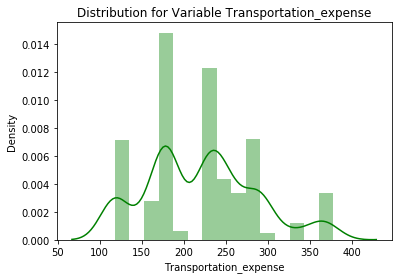

Distance_from_Residence_to_Work


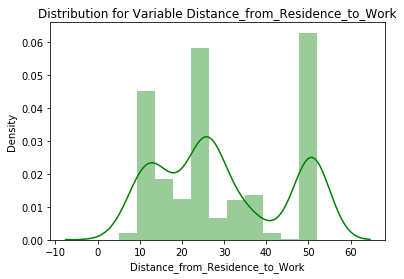

Service_time


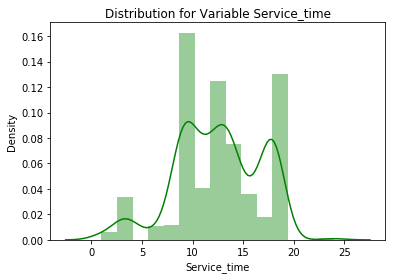

Age


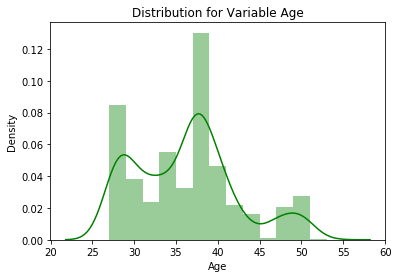

Work_load_Average/day_


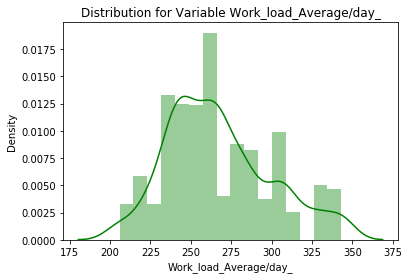

Hit_target


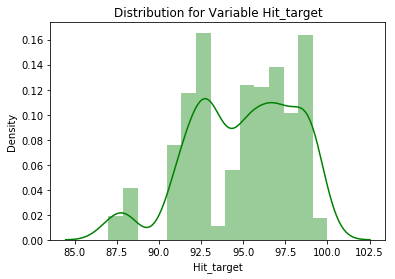

Height


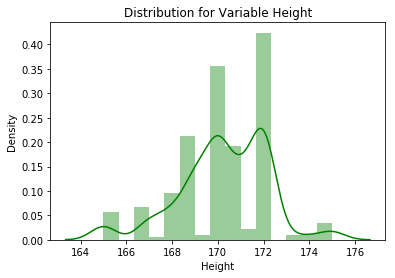

Body_mass_index


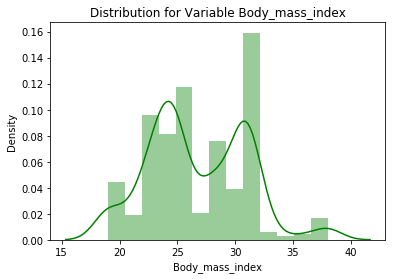

Absenteeism_time_in_hours


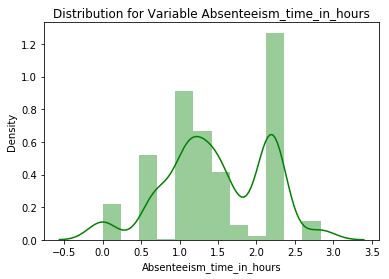

In [88]:
#Normality check to check data is uniformly distributed or not-

for i in cnames:
    print(i)
    sns.distplot(data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()    #From below lot its showing data is not uniformaly distributed, so we will do normalization for dataset.

In [89]:
#Normalization-
for i in cnames:
    if i== 'Absenteeism_time_in_hours':
        continue
    print(i)
    data[i]= (data[i]-min(data[i]))/(max(data[i])-min(data[i]))
    print(data[i])

Transportation_expense
0      0.657692
1      0.000000
2      0.234615
3      0.619231
4      0.657692
5      0.934615
6      0.546154
7      0.142308
8      0.450000
9      0.546154
10     0.546154
11     0.546154
12     0.234615
13     0.234615
14     0.234615
15     0.234615
16     0.273077
17     0.500000
18     0.234615
19     0.934615
20     0.546154
21     0.657692
22     0.934615
23     0.657692
24     0.150000
25     0.657692
26     0.234615
27     0.234615
28     0.450000
29     0.199732
         ...   
688    1.000000
689    0.000000
690    0.442308
691    0.234615
692    0.450000
693    0.576923
694    0.000000
695    0.234615
696    0.665385
697    0.234615
698    0.000000
699    0.442308
700    0.000000
701    0.000000
702    0.442308
703    0.450000
704    0.442308
705    0.423077
706    0.000000
707    0.423077
708    0.273077
709    0.000000
710    0.934615
711    0.411538
712    0.965385
713    0.657692
714    0.450000
715    0.000000
716    0.434615
717    0.234615
N

Transportation_expense


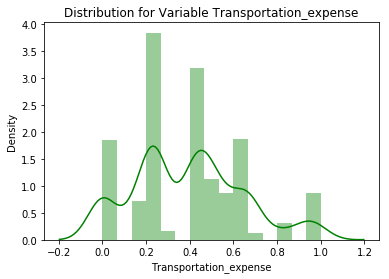

Distance_from_Residence_to_Work


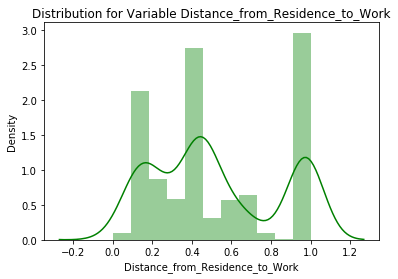

Service_time


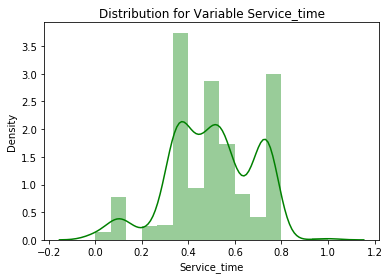

Age


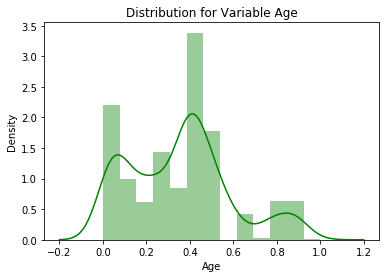

Work_load_Average/day_


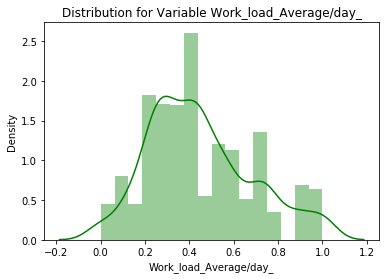

Hit_target


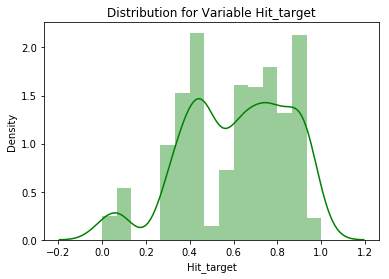

Height


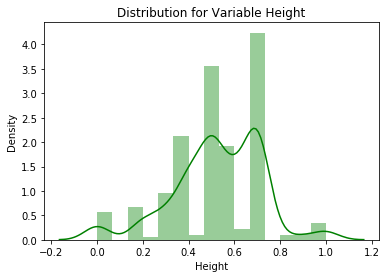

Body_mass_index


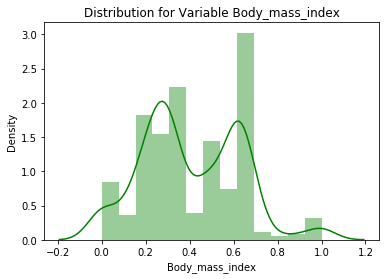

Absenteeism_time_in_hours


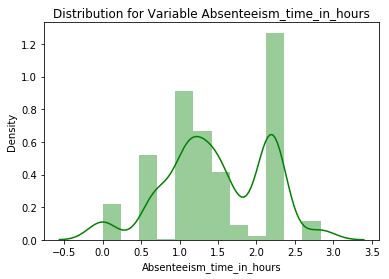

In [90]:
#probablility distribution of data after normalization-
for i in cnames:
    print(i)
    sns.distplot(data[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [91]:
data.describe()

,Reason_for_absence,Day_of_the_week,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Son,Social_drinker,Height,Body_mass_index,Absenteeism_time_in_hours
count,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000,718.000000
mean,19.409471,3.899721,0.392188,0.522314,0.498849,0.352290,0.446823,0.611342,0.045961,1.001393,0.565460,0.526298,0.405442,1.482805
std,8.279768,1.419519,0.251248,0.314352,0.180409,0.234611,0.235301,0.237132,0.209547,1.084311,0.496042,0.193886,0.225525,0.658182
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,3.000000,0.234615,0.234043,0.347826,0.153846,0.280116,0.461538,0.000000,0.000000,0.000000,0.400000,0.263158,1.098612
50%,23.000000,4.000000,0.411538,0.446809,0.521739,0.384615,0.424739,0.615385,0.000000,1.000000,1.000000,0.500000,0.315789,1.386294
75%,26.000000,5.000000,0.546154,0.957447,0.652174,0.500000,0.574766,0.769231,0.000000,2.000000,1.000000,0.699999,0.631579,2.197225
max,28.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,2.833213


In [92]:
#write Normalized data into drive-
data.to_csv("Absenteeism_Pre_processed_Data.csv",index=False)

# Machine Learning Model Devlopment-

# Train-Test Split-

In [93]:
#Import libraries-
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split 
from sklearn.metrics import mean_squared_error

C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [134]:
#make copy of data for reference-
#df=data
data=df.copy()

In [135]:
#Convert categorical to dummy variable-
data = pd.get_dummies(data,columns=cat_cnames)

#split data for predictor and target seperatly-
X= data.drop(['Absenteeism_time_in_hours'],axis=1)
y= data['Absenteeism_time_in_hours']

#Divide data into train and test-
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=220192)

# Decision Tree-

In [96]:
#import libraries-
from sklearn.tree import DecisionTreeRegressor

#Decision tree for regression-
DT_model= DecisionTreeRegressor().fit(X_train,y_train)

#model prediction on train data-
DT_train= DT_model.predict(X_train)

#model prediction on test data-
DT_test= DT_model.predict(X_test)

#RMSE for train data-
RMSE_train=np.sqrt(mean_squared_error(y_train,DT_train))

#RMSE for test data-
RMSE_test=np.sqrt(mean_squared_error(y_test, DT_test))

#r2 value for train data-
r2_train= r2_score(y_train,DT_train)

#r2 value for test data-
r2_test=r2_score(y_test,DT_test)

print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.0788495202003774
Root Mean Square Rate for test data=0.5131222099616964
R^2_score for train data=0.985408233172478
R^2_score for test data=0.42560025979778693


# Random Forest

In [141]:
#import libraris-
from sklearn.ensemble import RandomForestRegressor

#Random Forest for regression-
RF_model= RandomForestRegressor(n_estimators=300).fit(X_train,y_train)

#model prediction on train data-
RF_train= RF_model.predict(X_train)

#model prediction on test data-
RF_test= RF_model.predict(X_test)

#RMSE for train data-
RMSE_train=np.sqrt(mean_squared_error(y_train, RF_train))

#RMSE for test data-
RMSE_test=np.sqrt(mean_squared_error(y_test, RF_test))

#r2 value for train data-
r2_train= r2_score(y_train,RF_train)

#r2 value for test data-
r2_test=r2_score(y_test,RF_test)

print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.18029356384203085
Root Mean Square Rate for test data=0.3836894649958583
R^2_score for train data=0.9237095427126606
R^2_score for test data=0.6788319325296582


# Linear Regression

In [110]:
#import libraries-
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

#Linear Regression model for regression-
LR_model= sm.OLS(y_train,X_train).fit()
print(LR_model.summary())

                                OLS Regression Results                               
Dep. Variable:     Absenteeism_time_in_hours   R-squared:                       0.588
Model:                                   OLS   Adj. R-squared:                  0.553
Method:                        Least Squares   F-statistic:                     16.73
Date:                       Mon, 25 Mar 2019   Prob (F-statistic):           3.38e-75
Time:                               17:48:25   Log-Likelihood:                -315.27
No. Observations:                        574   AIC:                             722.5
Df Residuals:                            528   BIC:                             922.8
Df Model:                                 45                                         
Covariance Type:                   nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [111]:
#model prediction on train data-
LR_train= LR_model.predict(X_train)

#model prediction on test data-
LR_test= LR_model.predict(X_test)

#RMSE for train data-
RMSE_train=np.sqrt(mean_squared_error(y_train,LR_train))

#RMSE for test data-
RMSE_test=np.sqrt(mean_squared_error(y_test,LR_test))

#r2 for train data-
r2_train=r2_score(y_train,LR_train)

#r2 for test data-
r2_test=r2_score(y_test,LR_test)

print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.4190847663653237
Root Mean Square Rate for test data=0.4201877072548572
R^2_score for train data=0.5877947485093136
R^2_score for test data=0.6148239329765861


# Gradient Boosting

In [112]:
#import libraries-
from sklearn.ensemble import GradientBoostingRegressor

#Gradient Boosting for regression-
GB_model = GradientBoostingRegressor().fit(X_train, y_train)

#model prediction on train data-
GB_train= GB_model.predict(X_train)

#model prediction on test data-
GB_test= GB_model.predict(X_test)

#RMSE for train data-
RMSE_train=np.sqrt(mean_squared_error(y_train,GB_train))

#RMSE for test data-
RMSE_test=np.sqrt(mean_squared_error(y_test, GB_test))

#r2 value for train data-
r2_train= r2_score(y_train,GB_train)

#r2 value for test data-
r2_test=r2_score(y_test,GB_test)

print("Root Mean Square Rate for train data="+str(RMSE_train))
print("Root Mean Square Rate for test data="+str(RMSE_test))
print("R^2_score for train data="+str(r2_train))
print("R^2_score for test data="+str(r2_test))

Root Mean Square Rate for train data=0.35842713783278973
Root Mean Square Rate for test data=0.3990074797536028
R^2_score for train data=0.6984831830720599
R^2_score for test data=0.6526760889868312


# 1. What changes company should bring to reduce the number of absenteeism?

In [120]:
#save data copy for refrence-
#df2=df1.copy()
df1=df2.copy()

In [121]:
# Combining similar groups in Reason for absence for batter visualization-
df1['Reason_for_absence'] = df1['Reason_for_absence'].replace({0:1,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1,10:1,11:1,12:1,
                                                             13:1,14:1,15:1,16:1,17:1,18:1,19:1,20:1,21:2,22:2,23:3,
                                                             24:3,25:4,26:5,27:2,28:2})

In [115]:
df1.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,5.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,1.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,172.0,31.0,0.0
2,3.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,1.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,3.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [116]:
df1.columns

Index(['Reason_for_absence', 'Month_of_absence', 'Day_of_the_week', 'Seasons',
       'Transportation_expense', 'Distance_from_Residence_to_Work',
       'Service_time', 'Age', 'Work_load_Average/day_', 'Hit_target',
       'Disciplinary_failure', 'Education', 'Son', 'Social_drinker',
       'Social_smoker', 'Pet', 'Weight', 'Height', 'Body_mass_index',
       'Absenteeism_time_in_hours'],
      dtype='object')

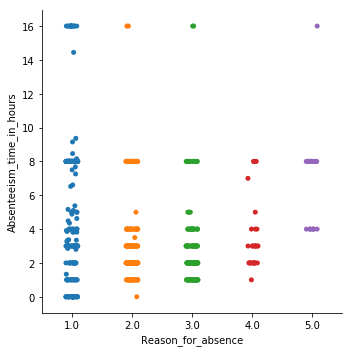

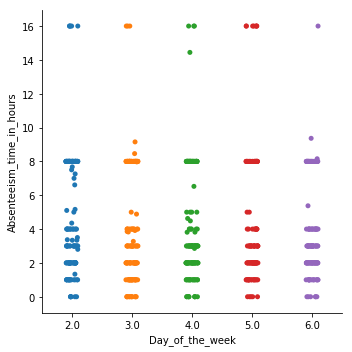

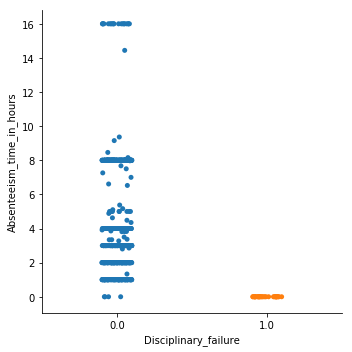

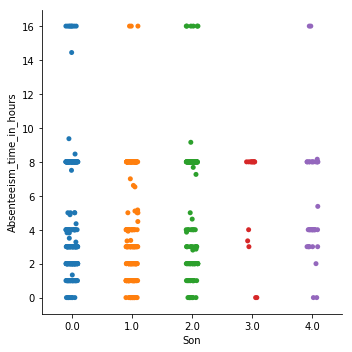

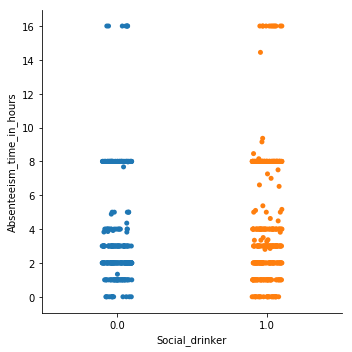

In [117]:
for i in cat_cnames:
    sns.catplot(x=i, y="Absenteeism_time_in_hours", data=df1)
    fname = str(i)+'.pdf'
    plt.savefig(fname)    

From the above plots we can say that people with only a high school degree are absent more often. The reson frequently used is 1 in absenteeism hrs.which is code of Diseases.we can see that people with no children or no pets tend to be absent more ofte than people who have children or pets. we can also see that the people who are social drinker tend to be absent more as comapre to non drinker. Absenteeism through months and days of week and seasons are almost constant. People with disciplinary failure o have maximum absenteeism.

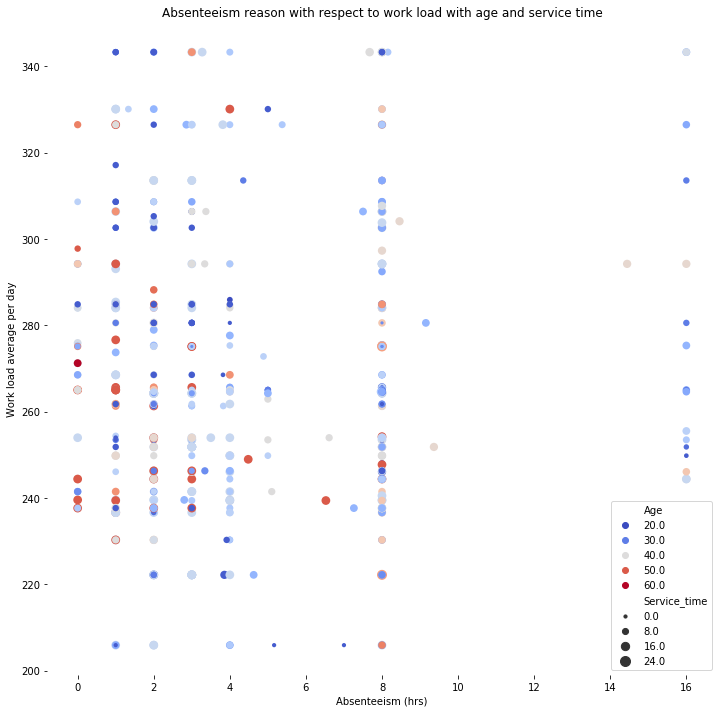

In [122]:
#Absenteeism visualization-
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
ax5 = sns.scatterplot(x="Absenteeism_time_in_hours", y="Work_load_Average/day_",
                hue="Age", size="Service_time",
                palette="coolwarm",
                sizes=(10, 100), linewidth=0,
                data=df1, ax=ax)
ax5.set_title("Absenteeism reason with respect to work load with age and service time")
ax5.set_ylabel("Work load average per day")
ax5.set_xlabel("Absenteeism (hrs)")
plt.savefig('Absenteeism_reason1.pdf')

Employee who have work load between 240 to 300 minutes and age below 30 and serive time is below 8, these employee tend to absent more frequently

# 2. How much losses every month can we project in 2011 if same trend of absenteeism continues?


In [123]:
#data-
predict_loss= df1

In [124]:
predict_loss.head()

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours
0,5.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,1.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,97.0,1.0,1.0,1.0,1.0,0.0,0.0,98.0,172.0,31.0,0.0
2,3.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,97.0,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,1.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,97.0,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,3.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239.554,97.0,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [125]:
#work loss per month-
predict_loss['work_loss_average/day'] = 0
for i  in range(len(predict_loss)):
    predict_loss['work_loss_average/day'].loc[i] = ((predict_loss['Work_load_Average/day_'].loc[i])/24)*predict_loss['Absenteeism_time_in_hours'].loc[i]

C:\Users\Mayur Sharma\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [126]:
predict_loss

,Reason_for_absence,Month_of_absence,Day_of_the_week,Seasons,Transportation_expense,Distance_from_Residence_to_Work,Service_time,Age,Work_load_Average/day_,Hit_target,...,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_time_in_hours,work_loss_average/day
0,5.0,7.0,3.0,1.0,289.000000,36.0,13.0,33.000000,239.554,97.0,...,1.0,2.0,1.0,0.0,1.0,90.0,172.000000,30.000000,4.000000,39.925667
1,1.0,7.0,3.0,1.0,118.000000,13.0,18.0,50.000000,239.554,97.0,...,1.0,1.0,1.0,0.0,0.0,98.0,172.000000,31.000000,0.000000,0.000000
2,3.0,7.0,4.0,1.0,179.000000,51.0,18.0,38.000000,239.554,97.0,...,1.0,0.0,1.0,0.0,0.0,89.0,170.000000,31.000000,2.000000,19.962833
3,1.0,7.0,5.0,1.0,279.000000,5.0,14.0,39.000000,239.554,97.0,...,1.0,2.0,1.0,1.0,0.0,68.0,168.000000,24.000000,4.000000,39.925667
4,3.0,7.0,5.0,1.0,289.000000,36.0,13.0,33.000000,239.554,97.0,...,1.0,2.0,1.0,0.0,1.0,90.0,172.000000,30.000000,2.000000,19.962833
5,2.0,7.0,6.0,1.0,360.999993,52.0,3.0,28.000000,239.554,97.0,...,1.0,1.0,1.0,0.0,4.0,80.0,172.000000,27.000000,8.000000,79.851333
6,3.0,7.0,6.0,1.0,260.000000,50.0,11.0,36.000000,239.554,97.0,...,1.0,4.0,1.0,0.0,0.0,65.0,168.000000,23.000000,4.000000,39.925667
7,1.0,7.0,2.0,1.0,155.000000,12.0,14.0,34.000000,239.554,97.0,...,1.0,2.0,1.0,0.0,0.0,95.0,172.000000,25.000000,2.801596,27.963902
8,2.0,7.0,2.0,1.0,235.000000,11.0,14.0,37.000000,239.554,97.0,...,3.0,1.0,0.0,0.0,1.0,88.0,172.000000,29.000000,8.000000,79.851333
9,1.0,7.0,2.0,1.0,260.000000,50.0,11.0,36.000000,239.554,97.0,...,1.0,4.0,1.0,0.0,0.0,65.0,168.000000,23.000000,8.000000,79.851333


In [127]:
#total absenteeism per month-
Absenteeism_hours_monthly = predict_loss.groupby('Month_of_absence').sum()

In [128]:
Absenteeism_hours_monthly= Absenteeism_hours_monthly[['Absenteeism_time_in_hours','work_loss_average/day']]

In [129]:
Monthly_loss= Absenteeism_hours_monthly.rename(columns={'Absenteeism_time_in_hours': 'Absenteeism time/month(hrs.)', 
                            'work_loss_average/day': 'Work loss per month'})

In [130]:
Monthly_loss

,Absenteeism time/month(hrs.),Work loss per month
Month_of_absence,,
1.0,171.685945,2258.468119
2.0,279.364511,3167.553023
3.0,443.587342,5202.503497
4.0,239.915715,2732.079510
5.0,259.744293,2651.602016
6.0,240.571077,2710.274163
7.0,370.688157,3914.799765
8.0,237.163987,2332.985366
9.0,186.884730,2118.879953


#                                          Thank You